AttributeError: module 'cv2' has no attribute 'KNearest'

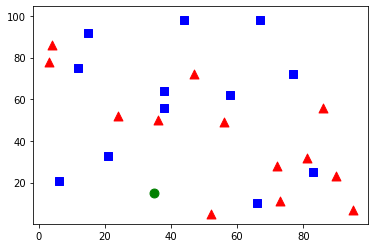

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# Labels each one either red or blue with number 0 & 1
responses = np.random.randint(0, 2, (25,1)).astype(np.float32)

# Take red families and plot them
red = trainData[responses.ravel() == 0]
plt.scatter(red[:, 0], red[:,1], 80, 'r', '^')

# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:, 0], blue[:,1], 80, 'b', 's')

newcomer = np.random.randint(0, 100, (1,2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'o')

knn = cv2.K
knn.train(trainData, responses)
ret, results, neighbours, dist = knn.find_nearest(newcomer, 3)

print("results", results, '\n')

plt.show()

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('mario_coin.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.KNearest()
knn.train(train,train_labels)
ret,result,neighbours,dist = knn.find_nearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)
# save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
# Now load the data
with np.load('knn_data.npz') as data:
    print(data.files)
    train = data['train']
    train_labels = data['train_labels']

ValueError: array split does not result in an equal division